Instruction: Team project. Work with your teamate and submit one file to BBlearn by the end of 4/7/2023.
<br> You are allowed to use any resource online or offline. 

1. SGD with momentum
<br> Read the following menual, and try to understand the pseudo-code.
<br> https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
<br> (a) Question: How does the momentum parameter plays a role in the SGD function?

Answer:

(b) Add the momentum parameter in the following code (an example we did in class), plot the loss function before and after adding the momentum parameter, and see which one goes faster. If you set up the parameter correctly, you should see a faster convergence.

In [8]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
# 0. prepare data
x_np,y_np = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
#convert to torch tensor, it was double data type, want to convert to float32
x=torch.from_numpy(x_np.astype(np.float32))
y=torch.from_numpy(y_np.astype(np.float32))
print(x.shape)
print(y.shape)
#want to change the shape of y to one column
y=y.view(y.shape[0],1)
#print(y)
n_samples,n_features=x.shape
# 1. model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)
# 2. loss and optimizer
learning_rate=0.01
loss_nn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
# 3. training loop
n_epochs=200
#save loss for figure
l_no_momt=torch.ones(n_epochs)
w_no_momt=torch.ones(n_epochs)
b_no_momt=torch.ones(n_epochs)
for epoch in range(n_epochs):
    
    #forward pass
    y_predicted = model(x)
    loss = loss_nn(y_predicted,y)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    [w, b] = model.parameters()
        
    if epoch%10==0:
        print(f'epoch:{epoch}, loss ={loss.item():.4f}')
    
    l_no_momt[epoch]=loss.item()
    w_no_momt[epoch]=w.item()
    b_no_momt[epoch]=b.item()

torch.Size([100, 1])
torch.Size([100])
epoch:0, loss =5857.5098
epoch:10, loss =4337.7192
epoch:20, loss =3238.6804
epoch:30, loss =2443.0286
epoch:40, loss =1866.4235
epoch:50, loss =1448.1630
epoch:60, loss =1144.4966
epoch:70, loss =923.8503
epoch:80, loss =763.4075
epoch:90, loss =646.6614
epoch:100, loss =561.6575
epoch:110, loss =499.7303
epoch:120, loss =454.5909
epoch:130, loss =421.6723
epoch:140, loss =397.6554
epoch:150, loss =380.1260
epoch:160, loss =367.3270
epoch:170, loss =357.9788
epoch:180, loss =351.1488
epoch:190, loss =346.1573


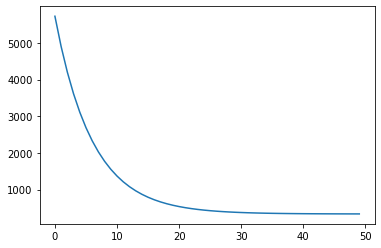

In [7]:
plt.plot(l_no_momt)

2.  Object Oriented Programming (OOP)
<br> To better understand how Pytorch, or in gerneral how Python class works, we covered the OOP in class. 
<br> Define a class named my_matrix. In this class, implement the following methods 
    - shape: return the number of rows, and number of columns
    - get: that take the number of rows, the number of columns as parameters, and returns the content of cell corresponding to row number col number 
    - scalar_mult: that take a scalar and return a new matrix which is the scalar product of matrix x val
    
Reate an example to test if your class is functioning as you expected.

In [13]:
import numpy as np
class my_matrix:
    def __init__(self,matrix):
        self.matrix = matrix
    def shape(self):
        return self.matrix.shape
    def get(self,row,col):
        return self.matrix[row,col]
    def scalar_mult(self,c):
        return c*self.matrix
        
        
    

In [14]:
A = np.array([[1,2,3],[4,5,6]])
print(A)
c = my_matrix(A)
c.scalar_mult(2)

[[1 2 3]
 [4 5 6]]


array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [26]:
class m2vector(my_matrix):
    def resize(self,row):
        if row==1:
            self.matrix = self.matrix.reshape(1,self.shape()[0]*self.shape()[1])

In [27]:
a=m2vector(A)
print(a.resize(1))
a.matrix

None


array([[1, 2, 3, 4, 5, 6]])

3.  Inherite the class you defined in problem 2 to define the new class named m2vector. Add the following method
- resize: resize the matrix to have only one row if the parameter row=1, otherwise, resize it to a column vector.

4. Super class. More to come